Getting tripped up over terminology is a common cause of frustration in students. Unfortunately, you often will read and hear other data scientists using different terminology for bootstrap samples and replicates. This is even more reason why we need everything to be clear and consistent for this course. So, before going forward discussing bootstrapping, let's get our terminology down. If we have a data set with n repeated measurements, a bootstrap sample is an array of length n that was drawn from the original data with replacement. What is a bootstrap replicate?
- A single value of a statistic computed from a bootstrap sample.

imagine you have a data set that has only three points, [-1, 0, 1]. How many unique bootstrap samples can be drawn (e.g., [-1, 0, 1] and [1, 0, -1] are unique), and what is the maximum mean you can get from a bootstrap sample? It might be useful to jot down the samples on a piece of paper.
- There are 27 unique samples, and the maximum mean is 1.

- Write a for loop to acquire 50 bootstrap samples of the rainfall data and plot their ECDF.
- Use np.random.choice() to generate a bootstrap sample from the NumPy array rainfall. Be sure that the size of the resampled array is len(rainfall).
- Use the function ecdf() that you wrote in the prequel to this course to generate the x and y values for the ECDF of the bootstrap sample bs_sample.
- Plot the ECDF values. Specify color='gray' (to make gray dots) and alpha=0.1 (to make them semi-transparent, since we are overlaying so many) in addition to the marker='.' and linestyle='none' keyword arguments.
- Use ecdf() to generate x and y values for the ECDF of the original rainfall data available in the array rainfall.
- Plot the ECDF values of the original data.
- Hit submit to visualize the samples!

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# , names=['yyyy','mm','tmax','tmin','af','rain' ,'sun']

# weather = pd.read_csv("sheffield_weather_station.csv",sep='\t', comment='#',header=None)
# print(weather.columns)
# print(weather.head(2))
# rain = []
# for index, row in weather[1:].iterrows():
#     print(index)


In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [56]:
# for _ in range(50):
#     # Generate bootstrap sample: bs_sample
#     bs_sample = np.random.choice(rainfall, size=len(rainfall))

#     # Compute and plot ECDF from bootstrap sample
#     x, y = ecdf(bs_sample)
#     _ = plt.plot(x, y, marker='.', linestyle='none',
#                  color='gray', alpha=0.1)

# # Compute and plot ECDF from original data
# x, y = ecdf(rainfall)
# _ = plt.plot(x, y, marker='.')

# # Make margins and label axes
# plt.margins(0.02)
# _ = plt.xlabel('yearly rainfall (mm)')
# _ = plt.ylabel('ECDF')

# # Show the plot
# plt.show()

- Define a function with call signature draw_bs_reps(data, func, size=1).
- Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap replicates.
- Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the replicate in the appropriate index of bs_replicates.
- Return the array of replicates bs_replicates. This has already been done for you.

In [68]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [69]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


- Draw 10000 bootstrap replicates of the mean annual rainfall using your draw_bs_reps() function and the rainfall array. Hint: Pass in np.mean for func to compute the mean.
- As a reminder, draw_bs_reps() accepts 3 arguments: data, func, and size.
- Compute and print the standard error of the mean of rainfall.
- The formula to compute this is np.std(data) / np.sqrt(len(data)).
- Compute and print the standard deviation of your bootstrap replicates bs_replicates.
- Make a histogram of the replicates using the normed=True keyword argument and 50 bins.
- Hit submit to see the plot!

In [70]:
# # Take 10,000 bootstrap replicates of the mean: bs_replicates
# bs_replicates = draw_bs_reps(rainfall, np.mean, size = 10000)

# # Compute and print SEM
# sem = np.std(rainfall) / np.sqrt(len(rainfall))
# print(sem)

# # Compute and print standard deviation of bootstrap replicates
# bs_std = np.std(bs_replicates)
# print(bs_std)

# # Make a histogram of the results
# _ = plt.hist(bs_replicates, bins=50, normed=True)
# _ = plt.xlabel('mean annual rainfall (mm)')
# _ = plt.ylabel('PDF')

# # Show the plot
# plt.show()

A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

In [71]:
# np.percentile(bs_replicates,[2.5,97.5])

- Draw 10000 bootstrap replicates of the variance in annual rainfall, stored in the rainfall dataset, using your draw_bs_reps() function. Hint: Pass in np.var for computing the variance.
- Divide your variance replicates (bs_replicates) by 100 to put the variance in units of square centimeters for convenience.
- Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.

In [72]:
# # Generate 10,000 bootstrap replicates of the variance: bs_replicates
# bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# # Put the variance in units of square centimeters
# bs_replicates = bs_replicates/100

# # Make a histogram of the results
# _ = plt.hist(bs_replicates, normed=True, bins = 50)
# _ = plt.xlabel('variance of annual rainfall (sq. cm)')
# _ = plt.ylabel('PDF')

# # Show the plot
# plt.show()


- Generate 10000 bootstrap replicates of  from the nohitter_times data using your draw_bs_reps() function. Recall that the optimal  is calculated as the mean of the data.
- Compute the 95% confidence interval using np.percentile() and passing in two arguments: The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.
- Print the confidence interval.
- Plot a histogram of your bootstrap replicates. This has been done for you, so hit submit to see the plot!

In [73]:
# # Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
# bs_replicates = draw_bs_reps(nohitter_times, np.mean, size = 10000)

# # Compute the 95% confidence interval: conf_int
# conf_int = np.percentile(bs_replicates, [2.5 , 97.5])

# # Print the confidence interval
# print('95% confidence interval =', conf_int, 'games')

# # Plot the histogram of the replicates
# _ = plt.hist(bs_replicates, bins=50, normed=True)
# _ = plt.xlabel(r'$\tau$ (games)')
# _ = plt.ylabel('PDF')

# # Show the plot
# plt.show()


- parametric estimate = parameters change in each sample. Like slope and intercept
- non-parametric estimate = parameters do not change in all sample. Like mean and std

- Define a function with call signature draw_bs_pairs_linreg(x, y, size=1) to perform pairs bootstrap estimates on linear regression parameters.
- Use np.arange() to set up an array of indices going from 0 to len(x). These are what you will resample and use them to pick values out of the x and y arrays.
- Use np.empty() to initialize the slope and intercept replicate arrays to be of size size.
- Write a for loop to:
- Resample the indices inds. Use np.random.choice() to do this.
- Make new  and  arrays bs_x and bs_y using the the resampled indices bs_inds. To do this, slice x and y with bs_inds.
- Use np.polyfit() on the new  and  arrays and store the computed slope and intercept.
- Return the pair bootstrap replicates of the slope and intercept.

In [74]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps


- Use your draw_bs_pairs_linreg() function to take 1000 bootstrap replicates of the slope and intercept. The x-axis data is illiteracy and y-axis data is fertility.
- Compute and print the 95% bootstrap confidence interval for the slope.
- Plot and show a histogram of the slope replicates. Be sure to label your axes. This has been done for you, so click submit to see your histogram!

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')
[0.04453799 0.05546913]


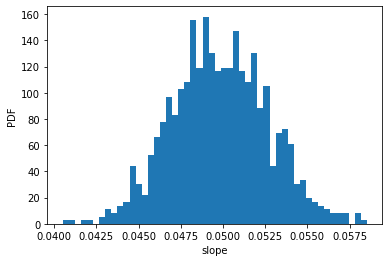

In [76]:
females = pd.read_csv("female_literacy_fertility.csv")
print(females.columns)
illiteracy = 1 - females['female literacy']
fertility = females['fertility']

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size = 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

- Generate an array of -values consisting of 0 and 100 for the plot of the regression lines. Use the np.array() function for this.
- Write a for loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for 100 lines.
- When plotting the regression lines in each iteration of the for loop, recall the regression equation y = a*x + b. Here, a is bs_slope_reps[i] and b is bs_intercept_reps[i].
- Specify the keyword arguments linewidth=0.5, alpha=0.2, and color='red' in your call to plt.plot().
- Make a scatter plot with illiteracy on the x-axis and fertility on the y-axis. Remember to specify the marker='.' and linestyle='none' keyword arguments.
- Label the axes, set a 2% margin, and show the plot. This has been done for you, so hit submit to visualize the bootstrap regressions!

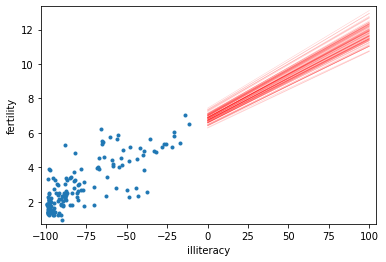

In [77]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility,marker = ".", linestyle="none")

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()